In [56]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression


In [57]:
df = pd.read_csv("https://raw.githubusercontent.com/Shreyas3108/house-price-prediction/master/kc_house_data.csv ")

In [58]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [59]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [60]:
x_norm =(df['price']-df['price'].min())/(df['price'].max()-df['price'].min())
x_norm

0        0.019266
1        0.060721
2        0.013770
3        0.069377
4        0.057049
5        0.150820
6        0.023934
7        0.028439
8        0.020262
9        0.032525
10       0.077049
11       0.051541
12       0.030820
13       0.042623
14       0.059672
15       0.075410
16       0.041967
17       0.053770
18       0.014951
19       0.020328
20       0.040656
21       0.252459
22       0.027541
23       0.023305
24       0.033311
25       0.020721
26       0.113049
27       0.077639
28       0.047607
29       0.084459
           ...   
21583    0.042616
21584    0.040000
21585    0.025574
21586    0.056393
21587    0.040656
21588    0.044525
21589    0.035738
21590    0.150492
21591    0.065180
21592    0.052459
21593    0.132852
21594    0.036066
21595    0.058361
21596    0.079338
21597    0.196721
21598    0.061220
21599    0.096393
21600    0.191738
21601    0.051410
21602    0.019541
21603    0.056689
21604    0.046426
21605    0.070254
21606    0.122295
21607    0

In [61]:
x_norm1=((df['price']-df['price'].mean())/(df['price'].max()-df['price'].min()))

In [62]:
x_norm1

0       -0.041730
1       -0.000274
2       -0.047225
3        0.008382
4       -0.003946
5        0.089825
6       -0.037061
7       -0.032556
8       -0.040733
9       -0.028471
10       0.016054
11      -0.009454
12      -0.030175
13      -0.018372
14      -0.001323
15       0.014415
16      -0.019028
17      -0.007225
18      -0.046044
19      -0.040667
20      -0.020339
21       0.191464
22      -0.033454
23      -0.037690
24      -0.027684
25      -0.040274
26       0.052054
27       0.016644
28      -0.013389
29       0.023464
           ...   
21583   -0.018379
21584   -0.020995
21585   -0.035421
21586   -0.004602
21587   -0.020339
21588   -0.016471
21589   -0.025257
21590    0.089497
21591    0.004185
21592   -0.008536
21593    0.071857
21594   -0.024930
21595   -0.002635
21596    0.018343
21597    0.135726
21598    0.000225
21599    0.035398
21600    0.130743
21601   -0.009585
21602   -0.041454
21603   -0.004307
21604   -0.014569
21605    0.009259
21606    0.061300
21607   -0

In [63]:
lg=np.log(df['price'])

In [64]:
lg

0        12.309982
1        13.195614
2        12.100712
3        13.311329
4        13.142166
5        14.018451
6        12.458775
7        12.583995
8        12.343658
9        12.685408
10       13.403776
11       13.056224
12       12.644328
13       12.899220
14       13.180632
15       13.384728
16       12.886641
17       13.091904
18       12.149502
19       12.345835
20       12.860999
21       14.508658
22       12.560244
23       12.439958
24       12.703813
25       12.358794
26       13.750439
27       13.410545
28       12.989974
29       13.485617
           ...    
21583    12.899095
21584    12.847927
21585    12.506177
21586    13.132314
21587    12.860999
21588    12.934828
21589    12.758520
21590    14.016409
21591    13.256894
21592    13.071070
21593    13.899852
21594    12.765688
21595    13.161584
21596    13.429775
21597    14.269766
21598    13.202652
21599    13.604790
21600    14.245343
21601    13.054085
21602    12.319401
21603    13.136759
21604    12.

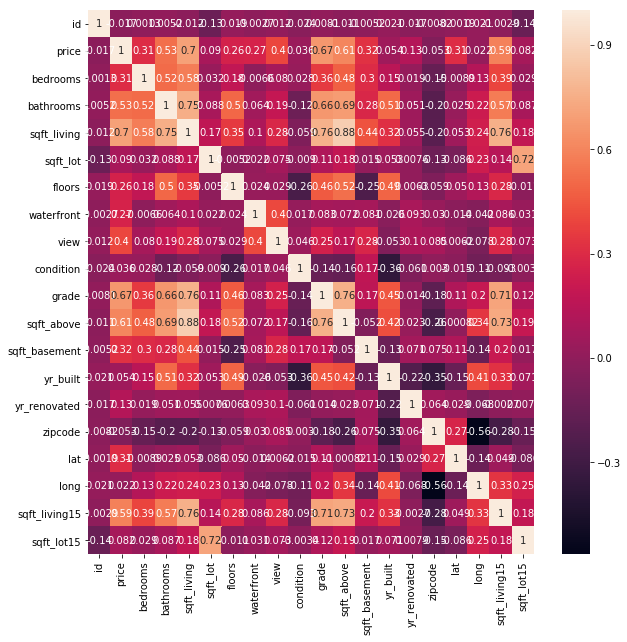

In [65]:
plt.figure(figsize =(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
df_numerics=df.select_dtypes(include=[np.number])
df_for_LR=df_numerics.loc[:,['grade','bathrooms']]

X=np.array(df_for_LR['grade']).reshape(21613,1)
Y=np.array(df_for_LR['bathrooms']).reshape(21613,1)

X_train,X_test,Y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=0)
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
y_pred=regressor.predict(X_test)
regressor.intercept_

array([-1.22704052])

In [71]:
regressor.coef_

array([[0.43663554]])

In [49]:
df=pd.DataFrame({'actual':list(y_test),'prediction':list(y_pred)})
df

,actual,prediction
0,[2],[3.1772535667402346]
1,[4],[4.616240526822578]
2,[2],[3.1772535667402346]
3,[2],[3.465050958756703]
4,[4],[3.7528483507731716]
5,[3],[3.1772535667402346]
6,[3],[3.1772535667402346]
7,[3],[3.465050958756703]
8,[4],[3.7528483507731716]
9,[5],[4.040645742789641]


In [72]:
from sklearn import metrics

In [73]:
print(metrics.mean_squared_error(y_test,y_pred))

0.33000216832568247


In [74]:
print(metrics.mean_absolute_error(y_test,y_pred))

0.45317997957087286


In [75]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.5744581519359635
